# 「面積」と「平均地価」をかけた特徴量を作成する！

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over110m2 = pd.read_csv('../data/handmade_data/over110m2.csv')
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
over90m2 = pd.read_csv('../data/handmade_data/over90m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
equipments = pd.read_csv('../data/handmade_data/equipments.csv')
latitude_longitude = pd.read_csv('../data/handmade_data/latitude_longitude.csv')
broadcasts = pd.read_csv('../data/handmade_data/broadcasts.csv')
stations_te = pd.read_csv('../data/handmade_data/stations_te.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over110m2 = pd.read_csv('../data/test_data/test_over110m2.csv')
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_over90m2 = pd.read_csv('../data/test_data/test_over90m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')
test_latitude_longitude = pd.read_csv('../data/test_data/test_latitude_longitude.csv')
test_broadcasts = pd.read_csv('../data/test_data/test_broadcasts.csv')
test_stations_te = pd.read_csv('../data/test_data/test_stations_te.csv')

Duplicate key in file PosixPath('/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')


In [2]:
area_x_landprice = area_size['面積'] * land_aveprice['平均地価']

In [3]:
area_x_landprice = pd.DataFrame(area_x_landprice)
area_x_landprice.columns = ['面積＊地価']

In [4]:
area_x_landprice.to_csv('../data/handmade_data/area_x_landprice.csv',index=False)

In [5]:
test_area_x_landprice = test_area_size['面積'] * test_land_aveprice['平均地価']

In [6]:
test_area_x_landprice = pd.DataFrame(test_area_x_landprice)
test_area_x_landprice.columns = ['面積＊地価']

In [7]:
test_area_x_landprice.to_csv('../data/test_data/test_area_x_landprice.csv',index=False)

新しく作成した特徴量をLightGBMに入力してみる！

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over110m2 = pd.read_csv('../data/handmade_data/over110m2.csv')
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
over90m2 = pd.read_csv('../data/handmade_data/over90m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
equipments = pd.read_csv('../data/handmade_data/equipments.csv')
latitude_longitude = pd.read_csv('../data/handmade_data/latitude_longitude.csv')
broadcasts = pd.read_csv('../data/handmade_data/broadcasts.csv')
stations_te = pd.read_csv('../data/handmade_data/stations_te.csv')
age_x_minits = pd.read_csv('../data/handmade_data/age_x_minits.csv')
area_x_landprice = pd.read_csv('../data/handmade_data/area_x_landprice.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over110m2 = pd.read_csv('../data/test_data/test_over110m2.csv')
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_over90m2 = pd.read_csv('../data/test_data/test_over90m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')
test_latitude_longitude = pd.read_csv('../data/test_data/test_latitude_longitude.csv')
test_broadcasts = pd.read_csv('../data/test_data/test_broadcasts.csv')
test_stations_te = pd.read_csv('../data/test_data/test_stations_te.csv')
test_age_x_minits = pd.read_csv('../data/test_data/test_age_x_minits.csv')
test_area_x_landprice = pd.read_csv('../data/test_data/test_area_x_landprice.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, age_x_minits,minits, land_aveprice, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, area_per_rooms, 
kitchen_points[['コンロ2口']], latitude_longitude[['平均緯度', '平均経度']],area_x_landprice,stations], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size,test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_age_x_minits, test_minits, test_land_aveprice, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets,test_buildings, test_over100m2, test_bt75and100m2, test_area_per_rooms, 
test_kitchen_points[['コンロ2口']], test_latitude_longitude[['平均緯度','平均経度']],test_area_x_landprice,test_stations], axis=1)
category_lists = ['定期借家', 'L', 'D','S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', 'コンロ2口']

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2930
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 22
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48857	valid_1's rmse: 50105.8


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument ins

[20]	training's rmse: 34599.1	valid_1's rmse: 37844.4
[30]	training's rmse: 26165.4	valid_1's rmse: 31002.7
[40]	training's rmse: 21413.2	valid_1's rmse: 27304.7
[50]	training's rmse: 18687.8	valid_1's rmse: 25250.1
[60]	training's rmse: 16968.9	valid_1's rmse: 24011.3
[70]	training's rmse: 15819.3	valid_1's rmse: 23267.5
[80]	training's rmse: 15018.7	valid_1's rmse: 22658.3
[90]	training's rmse: 14408.3	valid_1's rmse: 22157.8
[100]	training's rmse: 13903.1	valid_1's rmse: 21731
[110]	training's rmse: 13444.6	valid_1's rmse: 21335.4
[120]	training's rmse: 13080.2	valid_1's rmse: 21035.2
[130]	training's rmse: 12704.9	valid_1's rmse: 20807.5
[140]	training's rmse: 12379.1	valid_1's rmse: 20580.1
[150]	training's rmse: 12059.5	valid_1's rmse: 20319.9
[160]	training's rmse: 11782.6	valid_1's rmse: 20117.7
[170]	training's rmse: 11512.9	valid_1's rmse: 19940.8
[180]	training's rmse: 11266.5	valid_1's rmse: 19743.3
[190]	training's rmse: 11060.3	valid_1's rmse: 19557.2
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument ins

[30]	training's rmse: 27152.4	valid_1's rmse: 28220.3
[40]	training's rmse: 22645.8	valid_1's rmse: 24396.2
[50]	training's rmse: 20018.5	valid_1's rmse: 22508.9
[60]	training's rmse: 18389.6	valid_1's rmse: 21218.9
[70]	training's rmse: 17258.8	valid_1's rmse: 20323.6
[80]	training's rmse: 16451.7	valid_1's rmse: 19868.6
[90]	training's rmse: 15821.3	valid_1's rmse: 19538.5
[100]	training's rmse: 15298.1	valid_1's rmse: 19216.4
[110]	training's rmse: 14851.6	valid_1's rmse: 19025
[120]	training's rmse: 14433.4	valid_1's rmse: 18814.6
[130]	training's rmse: 14080	valid_1's rmse: 18720.9
[140]	training's rmse: 13745.2	valid_1's rmse: 18591
[150]	training's rmse: 13448.9	valid_1's rmse: 18530.1
[160]	training's rmse: 13140.8	valid_1's rmse: 18413.1
[170]	training's rmse: 12879.1	valid_1's rmse: 18319.1
[180]	training's rmse: 12621.5	valid_1's rmse: 18255.7
[190]	training's rmse: 12391.7	valid_1's rmse: 18136.7
[200]	training's rmse: 12142.5	valid_1's rmse: 18068.4
[210]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument ins

[30]	training's rmse: 27101.1	valid_1's rmse: 26638.6
[40]	training's rmse: 22630.1	valid_1's rmse: 22592.8
[50]	training's rmse: 19945.5	valid_1's rmse: 20725.9
[60]	training's rmse: 18288.1	valid_1's rmse: 19857.4
[70]	training's rmse: 17139.7	valid_1's rmse: 19335.1
[80]	training's rmse: 16289.6	valid_1's rmse: 19055.3
[90]	training's rmse: 15625.5	valid_1's rmse: 18815.3
[100]	training's rmse: 15064.8	valid_1's rmse: 18733
[110]	training's rmse: 14561.5	valid_1's rmse: 18644.6
[120]	training's rmse: 14124.9	valid_1's rmse: 18637.5
[130]	training's rmse: 13741.6	valid_1's rmse: 18583.2
[140]	training's rmse: 13396.6	valid_1's rmse: 18542.8
[150]	training's rmse: 13087.5	valid_1's rmse: 18525.3
[160]	training's rmse: 12794	valid_1's rmse: 18481.7
[170]	training's rmse: 12524.9	valid_1's rmse: 18445.7
[180]	training's rmse: 12272.2	valid_1's rmse: 18424.7
[190]	training's rmse: 12042.5	valid_1's rmse: 18379.4
[200]	training's rmse: 11829.2	valid_1's rmse: 18376.3
[210]	training's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument ins

[20]	training's rmse: 34823.2	valid_1's rmse: 35606.3
[30]	training's rmse: 26587.2	valid_1's rmse: 29230.4
[40]	training's rmse: 21989.2	valid_1's rmse: 25950.3
[50]	training's rmse: 19408.4	valid_1's rmse: 24272.7
[60]	training's rmse: 17688.9	valid_1's rmse: 23272.1
[70]	training's rmse: 16559.5	valid_1's rmse: 22704.9
[80]	training's rmse: 15744.1	valid_1's rmse: 22376.5
[90]	training's rmse: 15088	valid_1's rmse: 22078
[100]	training's rmse: 14569.6	valid_1's rmse: 21906.8
[110]	training's rmse: 14074.2	valid_1's rmse: 21695.4
[120]	training's rmse: 13664.6	valid_1's rmse: 21551.1
[130]	training's rmse: 13298	valid_1's rmse: 21399.6
[140]	training's rmse: 12949.8	valid_1's rmse: 21344.2
[150]	training's rmse: 12654.5	valid_1's rmse: 21269.7
[160]	training's rmse: 12353.4	valid_1's rmse: 21182.5
[170]	training's rmse: 12101.2	valid_1's rmse: 21143.5
[180]	training's rmse: 11853.1	valid_1's rmse: 21049.7
[190]	training's rmse: 11640.4	valid_1's rmse: 21026.2
[200]	training's rmse: 1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument ins

[10]	training's rmse: 48754.5	valid_1's rmse: 51220.4
[20]	training's rmse: 35170.2	valid_1's rmse: 37089.2
[30]	training's rmse: 27246.3	valid_1's rmse: 28638
[40]	training's rmse: 22868.1	valid_1's rmse: 24214.9
[50]	training's rmse: 20222.9	valid_1's rmse: 21474.6
[60]	training's rmse: 18544.9	valid_1's rmse: 19932.2
[70]	training's rmse: 17394.7	valid_1's rmse: 19029.4
[80]	training's rmse: 16573.8	valid_1's rmse: 18311
[90]	training's rmse: 15930	valid_1's rmse: 17824.6
[100]	training's rmse: 15394.8	valid_1's rmse: 17423.7
[110]	training's rmse: 14914.4	valid_1's rmse: 17072.3
[120]	training's rmse: 14494.6	valid_1's rmse: 16821.1
[130]	training's rmse: 14117.2	valid_1's rmse: 16576.6
[140]	training's rmse: 13780.9	valid_1's rmse: 16382.3
[150]	training's rmse: 13468.6	valid_1's rmse: 16234.1
[160]	training's rmse: 13164	valid_1's rmse: 16026.8
[170]	training's rmse: 12900.2	valid_1's rmse: 15916.2
[180]	training's rmse: 12637.1	valid_1's rmse: 15792.3
[190]	training's rmse: 1240

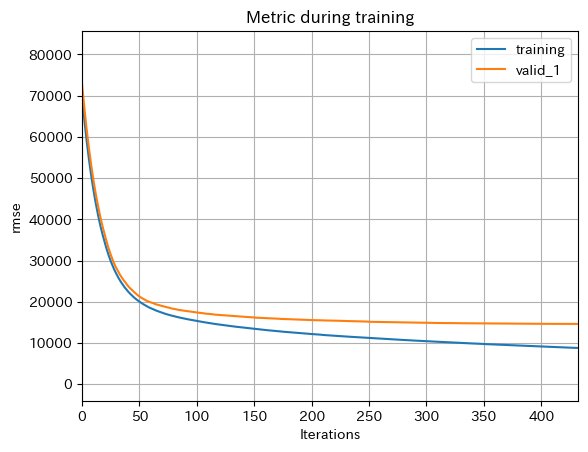

,importance
面積,4.472163e+14
L,3.888198e+14
平均地価,2.604684e+14
築年数,6.775398e+13
平均緯度,3.476119e+13
全体の階数,3.418605e+13
一部屋あたりの面積,2.654032e+13
築年数＊所要時間,2.384237e+13
平均経度,1.858973e+13
契約期間,1.475359e+13


In [8]:
n_split = 5
cv = KFold(n_splits=n_split, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GBDT = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

    params = {
        'objective':'regression',
        'boosting_type':'gbdt',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda':  5.009615137983937e-06,
        'max_bin': 346,
        'num_leaves': 91,
    }

    print('Start training...')
    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)